*Some Standard Python Imports*


In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# ``PyXspec`` Tutorial - Quick Version

This assumes the user already has a basic familiarity with both <a href="https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/index.html">``XSPEC``</a> and Python. Everything in ``PyXspec`` is accessible by importing the package xspec into your Python script.

``PyXspec`` can be utilized in a Python script or from the command line of the plain interactive Python interpreter. ``PyXspec`` does not implement its own command handler, so it is NOT intended to be run as the Python equivalent of a traditional interactive XSPEC session (which is really an enhanced interactive Tcl interpreter). In other words you launch an interactive PyXspec session with:

```
UNIX>python
>>> import xspec
>>>

rather than:

UNIX>xspec
XSPEC12>
```

**A Note on Nomenclature**: While the python version of ``xspec`` is sometimes referred to as ``Pyxspec``, the actual python package name is ``xspec``.  ``XSPEC`` refers to the standard (non-Python) command-line ``XSPEC`` software analysis suite.


# Importing the ``xspec`` package

In [6]:
import xspec

## Notes on Running ``PyXspec`` in a Jupyter Notebook
    
As noted above, PyXspec does not implement its own command handler.  This has implications when
running the ``xspec`` package in a ``Jupyter notebook`` (like this one).  When running an ``xspec`` session in a notebook, the  output from the python xspec package is by
default written to the terminal window from which you
opened the notebook. A work-around is to use the ``sys_pipes()`` function from the <a href="https://pypi.org/project/wurlitzer/">``wurlitzer``</a> Python package, which will capture information being written to ``STDOUT`` (i.e. the terminal) and re-direct it to display in the notebook.

In addition, interactive prompts are not handled correctly.  To avoid
the problem with interactive ``xspec`` prompts, you should turn off prompting by setting 

``xspec.Xset.allowPrompting = False``

(note that you do not need to set ``xspec.Xset.allowPrompting = False`` if you are using ``pyxspec`` from the command line in a terminal window.)

In [7]:
xspec.Xset.allowPrompting = False # keeps pyxspec from hanging, waiting for a response to a prompt

----
## Jumping In - The Really Quick Version

A simple Xspec load-fit-plot Python script may look something like this:
```
#!/usr/bin/python
from xspec import *

Spectrum("file1.pha")
Model("wabs*pow")
Fit.perform()
Plot.device ="/xs"
Plot("data")
```

Keeping this template in mind, we'll proceed to fill in the details...

# Some Details

## Terminology

This description uses the standard Python object-oriented terminology, distinguishing between classes and objects. Class is used when referring to the type or definition of an object. An object refers to a specific instance of a class and is normally assigned to a variable. For example a user may load 3 data files by creating 3 spectral data objects s1, s2, and s3, which are all instances of the class `Spectrum`.

The functions and stored data members that make up the definition of a class are referred to as methods and attributes respectively.

The term Standard XSPEC refers to the traditional ways of using XSPEC, either with a Tcl script or an interactive, command-line XSPEC session.

## The 6 Global Objects

An ``XSPEC`` session fundamentally consists of loading data, fitting that data to a model, and plotting the results. To manage these operations, ``PyXspec`` offers the user 6 global objects: ``AllChains``, ``AllData``, ``AllModels``, ``Fit``, ``Plot``, and ``Xset``. Note that these are NOT the names of classes. They are instantiated objects of the class types shown in Table 1.


<table>
<caption align="bottom">Table 1. PyXspec global objects</caption>
<tr bgcolor="9F90B9">
<th>Object Name </th><th>Class </th><th>Role  </th></tr>
<tr>
<td><em>AllChains</em> </td><td><b>ChainManager</b> </td><td>Monte Carlo Markov Chain container  </td></tr>
<tr>
<td><em>AllData</em> </td><td><b>DataManager</b> </td><td>Container for all loaded data sets (objects of class <b>Spectrum</b>)  </td></tr>
<tr>
<td><em>AllModels</em> </td><td><b>ModelManager</b> </td><td>Container for all <b>Model</b> objects  </td></tr>
<tr>
<td><em>Fit</em> </td><td><b>FitManager</b> </td><td>Manager class for setting properties and running a fit  </td></tr>
<tr>
<td><em>Plot</em> </td><td><b>PlotManager</b> </td><td>Manager class for performing XSPEC plots  </td></tr>
<tr>
<td><em>Xset</em> </td><td><b>XspecSettings</b> </td><td>Storage class for Xspec settings  </td></tr>
</table>

``PyXspec`` instantiates these objects immediately upon the importing of the ``xspec`` package. You cannot create any other objects of these class types, as they each allow only 1 instance of their type. (They are <a href="https://en.wikipedia.org/wiki/Singleton_pattern">*singletons* </a>in the language of design patterns.)

Operations involving these should ALWAYS be performed through the objects and NOT their class names. These class names should never appear in your code.

## A Note about indexing

True to its Fortran roots, ``Pyxspec`` uses a 1-based indexing when referring to model and data components.  Python uses a 0-based indexing (i.e. Python arrays start at 0).  So ``Pyxspec`` numbers the first spectrum in a group as spectrum 1, not spectrum 0.  Users should make note of this!  

## Getting Help

There are two ways to get help for programming with PyXspec classes. The first is by viewing the Classes section of this manual. The Classes:Class List subsection is particularly useful as an entry point, as it contains hyperlinks to descriptions of every PyXspec class that is part of the public interface. The second way is to call Python's built-in help([class]) function from the interactive Python shell. Both methods will display essentially the same information, which originates in the class docstrings in the code files.


---

Those are some of the under-the-hood details.  We'll next cover how to load spectra, define a model, fit data, plot data, and simulate spectra.

----
# Loading And Removing Data

Spectral data files can be loaded in several ways. You can create an object of the `Spectrum` class by passing it the data file name.  For example, suppose you had a spectrum in a pha file called spec.pha in a subdirectory `data` of your current working directory. To create a `Spectrum` object, do:

In [8]:
xspec.AllData.clear()  # clear out any previously loaded dataset
s1 = xspec.Spectrum("data/spec.pha")

Creating a `Spectrum` object in this way also adds the new object `s1` to the `AllData` container. Alternatively, you can simply add the new file directly to the container without retrieving a `Spectrum` object:

In [9]:
# add second spectrum to the container
xspec.AllData += "data/spec2.pha"  # then add it to the AllData Container

Later you can always obtain a ``Spectrum`` object reference to any of the loaded spectra by passing AllData an integer:

In [10]:
s2 = xspec.AllData(2) # s2 is a reference to the 2nd loaded spectrum

For more complicated data loading, you have access to the same functionality in Standard ``XSPEC``'s ``data`` command. Simply pass a string to ``AllData``:

In [11]:
xspec.AllData.clear() # remove previously loaded file
xspec.AllData("data/spec data/spec2 2:3 data/spec3")

Note that only the last example allows you to assign multiple data groups, the 3rd spectrum being assigned to data group 2. Also note that in the last example any previously loaded data sets are removed, thus reproducing the behavior of standard ``XSPEC``'s ``data`` command.

In addition to the ``AllData.clear()`` method, other ways of removing ``Spectrum`` objects (ie. data sets) from the container are shown below.

First let's load some spectral data:

In [12]:
xspec.AllData.clear() # remove previously loaded files
xspec.AllData("data/spec data/spec2 2:3 data/spec3") # load some data
s1 = xspec.AllData(1) # define spectrum s1



... and then remove some of the previously-loaded data:

In [13]:
xspec.AllData -= 3 # Removes the 3rd Spectrum object (the spectrum with index number 3) from the container.
xspec.AllData -= s1 # Removes the Spectrum object s1.
xspec.AllData -= "*" # Removes all Spectrum objects.



You can check the current state of the AllData container at any time by doing:


In [14]:
xspec.AllData("data/spec data/spec2 2:3 data/spec3") # load some data
xspec.AllData.show() # this will print in your terminal window if using an ipython/jupyter notebook

Similarly, to view information about a single Spectrum object:



In [15]:
s3 = xspec.AllData(3)
s3.show()

----

# Defining Models

The basic way of defining an ``XSPEC`` model is to create an object of the ``PyXspec`` class `Model`. Simply pass in a string containing a combination of 1 or more ``XSPEC`` model components. Since this uses the same syntax as ``XSPEC``'s ``model`` command, component abbreviations are allowed.


To get a list of currently-defined models:

In [ ]:
xspec.Model.showList()

Use the standard ``XSPEC`` syntax to define a model.  Component abbreviations are allowed:

In [16]:
m1 = xspec.Model("wa*po + ga")




When you define a model like this, PyXspec also automatically adds the new object to the global AllModels container. If the model is applied to multiple data groups, object copies are added to the container for each data group.

Similar to the case of spectral data, you can also load models directly into the global container:



In [22]:
# Another way to define a new model and create an object for each data group.
xspec.AllModels += "wa*po + ga"
xspec.AllModels += "wa*(apec + pow)"

# Retrieve the model object assigned to data group 1.
m1 = xspec.AllModels(1)


In [23]:
# Various ways to remove all model objects from the container.
xspec.AllModels.clear()
xspec.AllModels -= "*"

So let's define a model:

In [27]:

xspec.AllModels.clear() # clear previously defined models
xspec.AllModels += "wa*po + ga"
xspec.AllModels += "wa*(apec + pow)"


To display models and their parameters:

In [28]:
m1=xspec.AllModels(1)
m1.show()

In [31]:
# then show them
xspec.AllModels.show()

In [165]:
# While this displays just parameters 1,2,3 and 5:
xspec.AllModels.show("1-3, 5")

In [166]:
# This displays a single model object:
m1 = xspec.AllModels(1)
m1.show()

For defining mulitple (or named) models and assigning multiple sources, please see the ``Extended Tutorial``.

## Component and Parameter Objects

Model objects contain Component objects and Component objects contain Parameter objects. There are several ways to access and set components and parameters individually (and if you want to change many parameter values at once, it may be faster to use the Model or AllModels setPars methods described in the next section). Examples of individual Component and Parameter object access are shown below.



Accessing components by name:

In [17]:
# Component objects are accessible-by-name as Model object attributes:
comp1 = m1.wabs
comp2 = m1.powerlaw
print comp2.parameterNames

['PhoIndex', 'norm']


Accessing component parameters by name:

In [18]:
# Parameter objects are accessible-by-name as Component object attributes:
par6 = m1.powerlaw.PhoIndex
par6orig = par6.values[0]
print "Photon Index currently set to {0}".format(par6.values[0])

Photon Index currently set to 1.0


Modifying parameter values

In [35]:
# ...and we can modify their values:
par6.values = 3.5
print "Photon Index was {0}, now set to {1}".format(par6orig, par6.values[0])
m1.wabs.nH = 5.0
comp2.PhoIndex = 1.5

Photon Index was 1.0, now set to 3.5


You can also get a Parameter object directly from a Model, without going through a Component.
Just pass the Model the Parameter index number:

In [36]:
# 
par5 = m1(5)
print "Parameter 5 name = '{0}'.  Hi {0}!".format(par5.name)

Parameter 5 name = 'norm'.  Hi norm!


Some examples of numerical operations allowed with Parameter objects:

In [37]:
par4 = m1(4)
par4 += 0.75 # increment parameter 4 by 0.75
par4 *= 2.0 # multiply parameter 4 value by 2.0
y1 = m1.wabs.nH*100.0 # set y1 to 100x the column density of model m1
y2 = par4 + par5 # set y2 to the sum of par4 + par 5

In [38]:
par4.values

[1.5, -0.015, -0.999, -0.999, 10.0, 10.0]

(*For models with duplicate copies of components, see the ``Extended Tutorial`` for accessing Component objects by name.)

Note that in the above examples, only the parameter's value is being accessed or modified. To change all or part of its FULL list of settings (including auxiliary values: value, fit delta, min, bot, top, max), you can set its values attribute to a tuple or list of size 1-6:


In [39]:
par4.values = 4.3, .01, 1e-3
par4.values = [4.3, .01, 1e-3, 1e-2, 100, 200]

Or for greater flexibility you can set it to a string using Standard XSPEC's newpar command syntax:

In [40]:
# This allows you to set new values non-consecutively.
par4.values = "1.0, -.01,,,,150"

A quick way to freeze or thaw a parameter is to toggle its frozen attribute:




In [41]:
par4.frozen = False
par5.frozen = True

To link a parameter to one or more others, set its link attribute to a link expression string as you would have with the newpar command. To remove the link, set link to an empty string or call the parameter's untie method.




In [42]:
par5.link = "2.3 * 4" # Link par 5 to par 4 with a multiplicative constant.
par5.link = "" # Removes the link.
par5.untie() # Also removes the link.


Also ALL linked parameters in a model object can be untied with a single call to the Model class untie method, as show below.

In [21]:
m1.untie()

To display a parameter's full set of values (including auxiliary values), just print its values attribute:

In [43]:
print "The value of Parameter 4 and its auxiliary values are: {0}".format(par4.values)
print "\nCurrent value = {0}".format(par4.values[0])
print "Current delta = {0}".format(par4.values[1])
print "Current soft minimum = {0}".format(par4.values[2])
print "Current hard minimum = {0}".format(par4.values[3])
print "Current soft maximum = {0}".format(par4.values[4])
print "Current hard maximum = {0}".format(par4.values[5])

The value of Parameter 4 and its auxiliary values are: [1.0, 0.01, 0.001, 0.01, 100.0, 150.0]

Current value = 1.0
Current delta = 0.01
Current soft minimum = 0.001
Current hard minimum = 0.01
Current soft maximum = 100.0
Current hard maximum = 150.0


##  Setting Multiple Parameters At A Time

You can set multiple parameter values with a single call using the Model or AllModels setPars methods. This may be considerably faster than setting parameters one at a time through the individual Parameter objects as shown in the previous section. With setPars, the model will be recalculated just ONCE after all the changes have been made. But when setting through individual Parameter objects, the model will be recalculated after EACH parameter change.




In [178]:
# For Model object m1, supply 1 or more new parameter values in consecutive order:
m1.setPars(2.5, 1.4, 1.0e3) # This changes pars 1, 2, and 3.


In [179]:
# Can also change paramater auxiliary values by passing a string using the same
# syntax as with Standard XSPEC's newpar command:
m1.setPars(.95, "1.8,,-5,-4,10,10")

In [180]:
# Now set parameters NON-CONSECUTIVELY by passing a Python dictionary object.
# This example changes pars 1, 2, 4, and 6:
m1.setPars(.95, 1.2, {4:9.8, 6:2.0})


Parameters can also be initialized by passing values to the Model object constructor. You do this by setting the Model constructor's setPars keyword argument to a tuple, list, or dictionary (or just a single value or string if only setting the first parameter):

In [181]:
# Supply values for parameters 1 and 3, use defaults for the rest.
m = xspec.Model("wa*ga", setPars={1:1.5, 3:.2})

In [182]:
# Supply values for 1 and 2, use defaults for the rest.
m = xspec.Model("wa*ga", setPars=(1.5, 0.7))

In [183]:
# Supply value only for 1.
m = xspec.Model("wa*ga", setPars=1.5)

Finally, if you wish to set multiple parameters that belong to different model objects, you must use the AllModels container's `setPars` method. This is a quick way to change multiple parameter values at a time
since only a **SINGLE** recalculation will be performed at the end.
In contrast, when parameter values are changed through the individual 
parameter objects, the model is recalculated after EACH parameter
change.  (If all the parameters belong to a single model object,
you can also use the Model.setPars() function.)This follows the same syntax rules as the single Model setPars, except that you also supply the Model objects as arguments:



In [191]:
#
# Load 2 spectra into 2 separate data groups
#
xspec.AllData.clear()
xspec.AllData += "data/spec.pha" # read spectrum into first data group
# Explicitly specify the response if necessary
xspec.AllData(1).response = "data/spec.rmf" # this response include the effective area (ARF) information

xspec.AllData("2:2 data/spec_sim.pha") # read spectrum into data group 2
# Explicitly specify the response, if necessary
xspec.AllData(2).response = "data/spec3.rmf" # response includes the ARF already

#
# use AllModels.setPars to Change pars 1 and 3 in m1, and pars 1 and 2 in m2
#
xspec.AllModels.clear() # clear previous models
xspec.AllModels += "gauss + pow"
xspec.AllModels += "TBabs*apec"
m1 = xspec.AllModels(1)
m2 = xspec.AllModels(2)
xspec.AllModels.setPars(m1, {1:6.4, 3:1.78}, m2, {1:6.7, 3:5.5})
print "Value of Parameter 1 in m1 = {0:3.2f}, and in m2 = {1:3.2f}".format(m1(1).values[0], m2(1).values[0])
print "Value of Parameter 3 in m1 = {0:3.2f}, and in m2 = {1:3.2f}".format(m1(3).values[0], m2(3).values[0])

Value of Parameter 1 in m1 = 6.40, and in m2 = 6.70
Value of Parameter 3 in m1 = 1.78, and in m2 = 5.50


----

# Fitting

Once data and models are loaded, you can fit the model to the data usint the Fit object.  First you probably want to adjust the fitting parameters:





In [ ]:
xspec.Fit.nIterations = 100

You can set an appropriate fit statistic (``cstat``, ``chi``, etc) by assigning a value to ``xspec.Fit.statMethod``.  Below we use the ``cstat`` statistic

In [44]:
xspec.Fit.statMethod = "cstat"

Fitting is performed by calling the perform method of the Fit global object:

In [192]:
xspec.Fit.perform()

To display the fit results at any time:

In [112]:
xspec.Fit.show()

Please see the class reference guide and the ``Extended Tutorial`` for `Fit`'s complete functionality.

____

# Plotting

In Standard XSPEC, plot settings are adjusted using the ``setplot`` command while the plot is displayed through the plot command. In PyXspec, all plot settings and functionality is handled through the global Plot object. A device must be set before any plots can be displayed, and this done through the device attribute:

`xspec.Plot.device = "/xs"`

The device can also be set to print to an output file in several formats. The list of possible devices is given by the ``cpd`` command in the Standard XSPEC manual.

A typical setting to adjust is the X-axis units. You can choose to plot channel numbers, or select from various energy and wavelength units. The strings can also be abbreviated. Examples:

```
xspec.Plot.xAxis = "channel"
xspec.Plot.xAxis = "MeV"
xspec.Plot.xAxis = "Hz"
xspec.Plot.xAxis = "angstrom"
```

The displays of individual additive components or background spectra is toggled by setting their attributes to a bool:

```
xspec.Plot.add = True
xspec.Plot.background = False
```

Similarly log/linear settings for data plots (when using energy or wavelength units):

```
xspec.Plot.xLog = True
xspec.Plot.yLog = False
```

The current plot settings are displayed with:

`xspec.Plot.show()`

To actually display a plot, send 1 or more string arguments to the ``xspec.Plot`` ``__call__`` method.  Some examples:


* Single panel plots vs. Energy in keV:

In [45]:
xspec.Plot.xAxis = "keV"
xspec.Plot.device = "/xs"
xspec.Plot.setRebin = "3., 10" # rebin the data in the plot 
xspec.Plot("ldata")

* plot the model to a single panel

In [194]:
xspec.Plot("model")

* plot the unfolded spectrum

In [46]:
xspec.Plot("ufspec")

For multi-panel plots, simply add another plot type to the call to ``xspec.Plot``:

In [94]:
# Multi panel plots
xspec.Plot("data chisq")


In [96]:
xspec.Plot("data","model","resid")

* Calling ``xspec.Plot()`` with no arguments repeats the previous plot command

In [48]:
xspec.Plot()

After displaying a plot, you can get an array of the plotted values by calling one of ``xspec.Plot``'s retrieval methods. All of these functions take an optional plot group number argument for the case of multiple plot groups, and all return the plot values in a Python list.

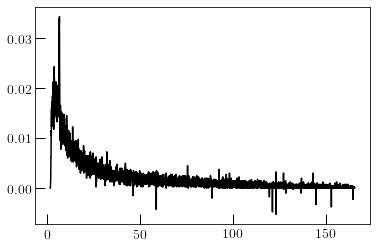

In [50]:
xspec.Plot("data")
xVals = xspec.Plot.x()
yVals = xspec.Plot.y()
yVals2 = xspec.Plot.y(1) # Gets values for data in the first plot group
modVals = xspec.Plot.model()
plt.plot(xVals, yVals)

You can get the background array for plotting but you need to set the ``xspec.Plot.background`` attribute to True first:

In [51]:
xspec.Plot.background = True
xspec.Plot("data")
bkg = xspec.Plot.backgroundVals()

You can also get the error array values for the X and Y axes:

In [52]:
# Retrieve error arrays
xErrs = xspec.Plot.xErr()
yErrs = xspec.Plot.yErr()

----

# Simulating Spectra

You can also create simulated spectra with PyXspec just as in the non-Python version.  The steps are very similar: define a model; read in an instrument response; then convolve the model through the response using the ``AllData`` container's ``Fakeit`` method 

## Clear any previously loaded data and models

In [8]:
#
# create simulated spectrum; first clear any previously loaded data and models
#
xspec.AllData.clear() 
xspec.AllModels.clear()

## Define A Model

In [16]:
mo = xspec.Model("tbabs*(apec + gauss + pow)")
# set parameter 1 (NH), 2 (kT), 5 (norm), 7 (sigma) 8 (line norm) and 10 (power law norm) to reasonable cosmic values
mo.setPars({1:4}, {2:50}, {5:0.01}, {7:0.01}, {8:1e-2}, {10:.1}) 

## Run ``xspec.AllData.fakeit()``

In [17]:
expo = 1e5 # use an exposure time of 100,000 seconds
fs = xspec.FakeitSettings(response = 'data/spec3.rmf', background='data/spec3_bkg.pha', exposure=str(expo), 
                         fileName='data/spec_sim.pha')
xspec.AllData.fakeit(1,fs)

## Plot the Data

Let's plot the simulated data in Python

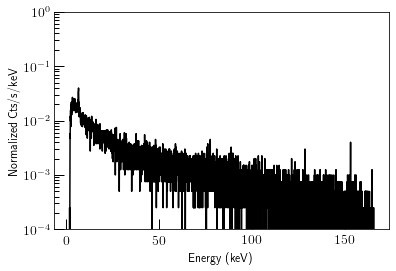

In [15]:
pha = xspec.AllData(1)
xspec.Plot.device="/null"
xspec.Plot.setRebin = "3., 10"
xspec.Plot.xAxis = 'keV'
xspec.Plot('data')
yscale('log')
ylim(0.0001,1)
xlabel('Energy (keV)')
ylabel('Normalized Cts/s/keV')
plot(xspec.Plot.x(1), xspec.Plot.y(1))